<a href="https://colab.research.google.com/github/vlamen/tue-deeplearning/blob/main/assignments/assignment1/workbook-task1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TODO: Modify this cell to add your group name, group number and your names and student IDs

Group: 99

Authors: Yang Yang 1552139, Ying Lu

In [1]:
import requests
import io

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Training data set

For task 1 of Assignment 1 you need to use a specific data set prepared using images from the [Omniglot dataset](https://github.com/brendenlake/omniglot). The provided training data set contains 18.800 binary images of handwritten characters of size (28,28). Each of these images depicts one of 893 different characters from 29 different alphabets. Each image is accompanied by a label that is encoded as an interger $y\in\{0, 1, ..., 892\}$ that indicate the caracter depicted in the image. The following cell provides code that loads the data from hardcoded URLs.

You can use the code in this cell to load the dataset or download the data set from the given URLs to your local drive (or your Google drive) and modify the code to load the data from another location. 


In [2]:
def load_numpy_arr_from_url(url):
    """
    Loads a numpy array from surfdrive. 
    
    Input:
    url: Download link of dataset 
    
    Outputs:
    dataset: numpy array with input features or labels
    """
    
    response = requests.get(url)
    response.raise_for_status()

    return np.load(io.BytesIO(response.content)) 

# Downloading may take a while..
train_x = load_numpy_arr_from_url('https://surfdrive.surf.nl/files/index.php/s/tvQmLyY7MhVsADb/download')
train_y = load_numpy_arr_from_url('https://surfdrive.surf.nl/files/index.php/s/z234AHrQqx9RVGH/download')

print(f"train_x shape: {train_x.shape}")
print(f"train_y shape: {train_y.shape}\n")

train_x shape: (18800, 28, 28)
train_y shape: (18800,)



In [3]:
from sklearn.model_selection import train_test_split

# train validation split
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, stratify=train_y)

### Query data set

For this task you need to use the following query data set. The dataset contains 100 sets of 6 images each. The images are also of hand written characters, however these characters are not present in the training data set. The characters in the query data set all come from the Greek alphabet that is not part of the set of alphabets in the training data. 

Each test set consists of 1 query image and 5 candidate images. All images are the same size (28x28). The test data is organized in two numpy arrays. One for the query images with shape (100, 1, 28, 28) and another for the candidate imagaes with shape (100, 5, 28, 28). 

The task is to develop a model that enables selecting the image which is depicting the same character as the anchor image out of 5 test images. These test images are declared in the `query_x` numpy array . 

Finally, we plot the first 5 cases in the query dataset. The first column corresponds with the anchor images of each of the 5 cases. All other images are test images from which the task is to recognize the anchor image. The image enclosed in a red box denotes the target image that your model should be able to recognize as the same class as the anchor image. 

In [4]:
query_dataset = load_numpy_arr_from_url("https://surfdrive.surf.nl/files/index.php/s/YGn5gb7unBEuCLB/download")
queries_true = load_numpy_arr_from_url("https://surfdrive.surf.nl/files/index.php/s/0sPeeIFB3W9RPZG/download")

queries, candidates_sets = np.split(query_dataset, [1], axis=1)

print(f"query images have shape: {queries.shape}")
print(f"target sets have shape: {candidates_sets.shape}")
print(f"ground truth: {queries_true.shape}")

query images have shape: (100, 1, 28, 28)
target sets have shape: (100, 5, 28, 28)
ground truth: (100,)


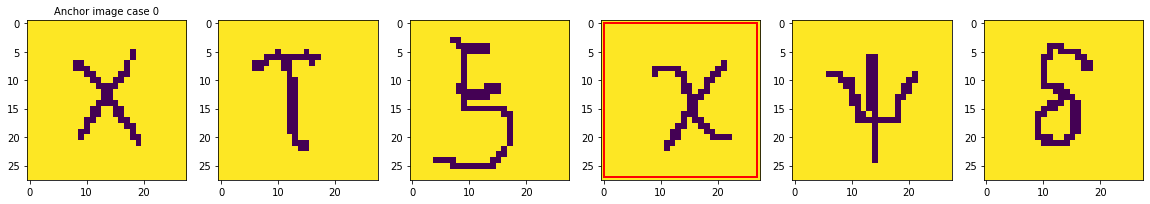

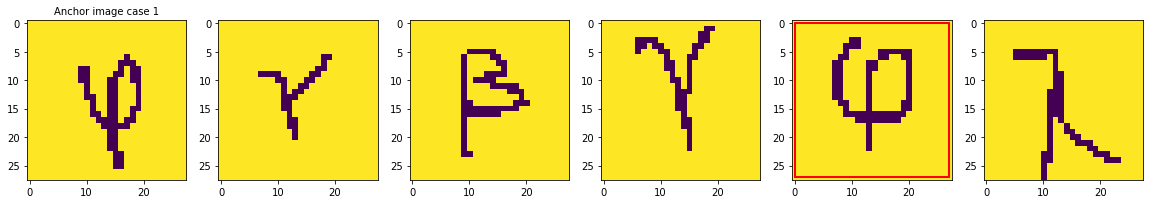

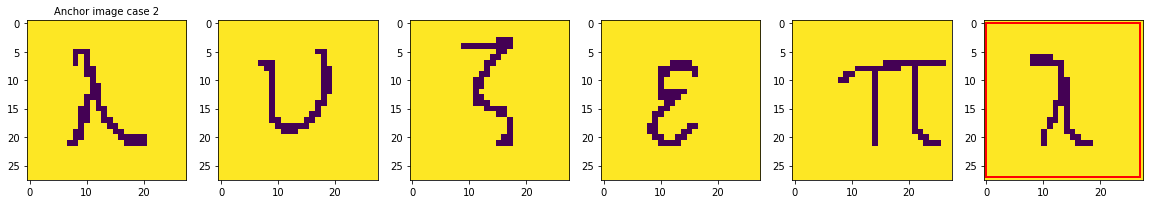

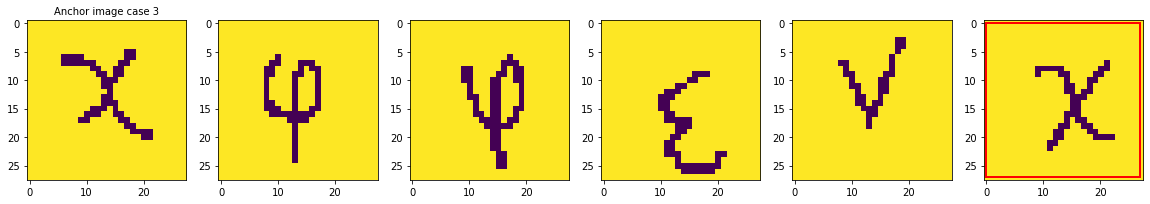

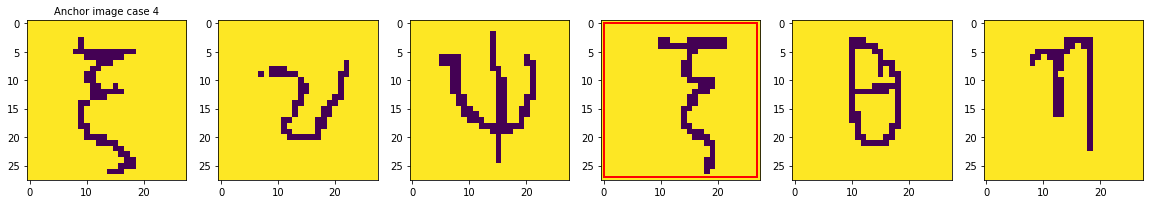

In [4]:
from matplotlib.patches import Rectangle

def plot_case(caseID):
    """
    Plots a single sample of the query dataset
    
    Inputs
    caseID: Integer between 0 and 99, each corresponding to a single sample in the query dataset 
    """
    
    f, axes = plt.subplots(1, 6, figsize=(20,5))
    
    # plot anchor image
    axes[0].imshow(queries[caseID, 0])
    axes[0].set_title(f"Anchor image case {caseID}", fontsize=10)
    
    # show all test images images 
    [ax.imshow(candidates_sets[caseID, i]) for i, ax in enumerate(axes[1:])]
    
    
    # Add the patch to the Axes
    axes[queries_true[caseID]].add_patch(Rectangle((0,0),27,27,linewidth=2, edgecolor='r',facecolor='none'))
    
    
    
    
# plot the first five samples of the query datset
[plot_case(caseID) for caseID in range(5)] ;

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import BatchSampler
import numpy as np

##
# TODO: Implement your recognition model here...
class Embedding(nn.Module):
    def __init__(self):
        super(Embedding, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            # nn.BatchNorm2d(256),
            # nn.ReLU(inplace=True),
            # nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            # nn.ReLU(inplace=True),
            # nn.MaxPool2d(kernel_size=2, stride=1),

            nn.Flatten(),
            nn.Linear(in_features=6272, out_features=1024),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=1024, out_features=512),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.layers(x)

# 

In [6]:
class BalancedBatchSampler(BatchSampler):
    """
    Returns batches of size n_classes * n_samples
    """

    def __init__(self, labels, n_classes, n_samples):
        self.labels = labels
        self.labels_set = list(set(self.labels))
        self.label_to_indices = {label: np.where(np.array(self.labels) == label)[0] for label in self.labels_set}
        for l in self.labels_set:
            np.random.shuffle(self.label_to_indices[l])
        self.used_label_indices_count = {label: 0 for label in self.labels_set}
        self.count = 0
        self.n_classes = n_classes
        self.n_samples = n_samples
        self.n_dataset = len(self.labels)
        self.batch_size = self.n_samples * self.n_classes

    def __iter__(self):
        self.count = 0
        while self.count + self.batch_size < self.n_dataset:
            classes = np.random.choice(self.labels_set, self.n_classes, replace=False)
            indices = []
            for class_ in classes:
                indices.extend(self.label_to_indices[class_][
                               self.used_label_indices_count[class_]:self.used_label_indices_count[class_] + self.n_samples])
                self.used_label_indices_count[class_] += self.n_samples
                if self.used_label_indices_count[class_] + self.n_samples > len(self.label_to_indices[class_]):
                    np.random.shuffle(self.label_to_indices[class_])
                    self.used_label_indices_count[class_] = 0
            yield indices
            self.count += self.n_classes * self.n_samples

    def __len__(self):
        return self.n_dataset // self.batch_size

train_x = np.expand_dims(train_x, axis=1).astype(float)
val_x = np.expand_dims(val_x, axis=1).astype(float)

train_data = torch.utils.data.TensorDataset(torch.tensor(train_x), torch.tensor(train_y))
val_data = torch.utils.data.TensorDataset(torch.tensor(val_x), torch.tensor(val_y))

train_batch_sampler = BalancedBatchSampler(train_data.tensors[1].cpu().data.numpy(), n_classes=np.unique(train_y).shape[0], n_samples=2)
triplets_train_loader = torch.utils.data.DataLoader(train_data, batch_sampler=train_batch_sampler)

val_batch_sampler = BalancedBatchSampler(val_data.tensors[1].cpu().data.numpy(), n_classes=np.unique(val_y).shape[0], n_samples=2)
triplets_val_loader = torch.utils.data.DataLoader(val_data, batch_sampler=val_batch_sampler)

In [7]:
from itertools import combinations

class RandomTripletSelector():
    """
    Select random negative  example for  each positive pair  to create triplets
    """

    def __init__(self):
        super(RandomTripletSelector, self).__init__()

    def get_triplets(self, embeddings, labels):
        labels = labels.cpu().data.numpy()
        triplets = []
        for label in set(labels):
            label_mask = (labels == label)
            label_indices = np.where(label_mask)[0]
            if len(label_indices) < 2:
                continue
            negative_indices = np.where(np.logical_not(label_mask))[0]
            anchor_positives = list(combinations(label_indices, 2))  # All anchor-positive pairs

            # random choose one negative example for each positive pair
            temp_triplets = [[anchor_positive[0], anchor_positive[1], np.random.choice(negative_indices)] for anchor_positive in anchor_positives]
            triplets += temp_triplets

        return torch.LongTensor(np.array(triplets))

In [8]:
class TripletLoss(nn.Module):
    """
    Triplets loss
    Takes a batch of embeddings and corresponding labels.
    Triplets are generated using triplet_selector object that take embeddings and targets and return indices of
    triplets
    """
    def __init__(self, margin, triplet_selector):
        super(TripletLoss, self).__init__()
        self.margin = margin
        self.triplet_selector = triplet_selector

    def forward(self, embeddings, target):

        triplets = self.triplet_selector.get_triplets(embeddings, target)

        if embeddings.is_cuda:
            triplets = triplets.cuda()

        anchor_idx= triplets[:, 0]
        positive_idx= triplets[:, 1]
        negative_idx= triplets[:, 2]

        ap_distances = (embeddings[anchor_idx] - embeddings[positive_idx]).pow(2).sum(1)  # .pow(.5)
        an_distances = (embeddings[anchor_idx] - embeddings[negative_idx]).pow(2).sum(1)  # .pow(.5)
        losses = F.relu(ap_distances - an_distances + self.margin)

        return losses.mean()

In [13]:
from tqdm import tqdm

class Trainer():
    def __init__(self,
                 model: torch.nn.Module,
                 device: torch.device,
                 criterion: torch.nn.Module,
                 optimizer: torch.optim.Optimizer,
                 training_dataLoader: torch.utils.data.Dataset,
                 validation_dataLoader: torch.utils.data.Dataset ,
                 epochs: int
                 ):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.training_dataLoader = training_dataLoader
        self.validation_dataLoader = validation_dataLoader
        self.device = device
        self.epochs = epochs

    def run_trainer(self):
        for epoch in tqdm(range(self.epochs)):
            self.model.train()  # train mode
            train_losses=[]
            for batch in self.training_dataLoader:
                x, y = batch
                input, target = x.to(device=self.device, dtype=torch.float), y.to(self.device)  # send to device (GPU or CPU)
                self.optimizer.zero_grad()  # zerograd the parameters
                out = self.model(input)  # one forward pass
                loss = self.criterion(out, target)  # calculate loss

                loss_value = loss.item()
                train_losses.append(loss_value)

                loss.backward()  # one backward pass
                self.optimizer.step()  # update the parameters

            self.model.eval()  # evaluation mode
            val_losses = []  # accumulate the losses here

            for batch in self.validation_dataLoader:
                x, y = batch
                input, target = x.to(device=self.device, dtype=torch.float), y.to(device=self.device, dtype=torch.float)  # send to device (GPU or CPU)
                with torch.no_grad():
                    out = self.model(input)   # one forward pass
                    loss = self.criterion(out, target) # calculate loss

                    loss_value = loss.item()
                    val_losses.append(loss_value)

            print('Epoch:', epoch)
            print('Training loss,', np.mean(train_losses))
            print('Validation loss,', np.mean(val_losses))

In [15]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device=torch.device('cpu')

# model
embedding_net = Embedding()
model = embedding_net.to(device)

# margin value
margin=1

# criterion
criterion = TripletLoss(margin,  RandomTripletSelector())

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# trainer
trainer = Trainer(model=model,
                  device=device,
                  criterion=criterion,
                  optimizer=optimizer,
                  training_dataLoader=triplets_train_loader,
                  validation_dataLoader=triplets_val_loader,
                  epochs=20)

# start training
trainer.run_trainer()

100%|██████████| 20/20 [00:47<00:00,  2.38s/it]


Epoch: 0
Training loss, 0.6951407960483006
Validation loss, 0.9990586042404175
Epoch: 1
Training loss, 0.37921943834849764
Validation loss, 0.9856183528900146
Epoch: 2
Training loss, 0.31437426805496216
Validation loss, 0.8914541006088257
Epoch: 3
Training loss, 0.2941228917666844
Validation loss, 0.6589556336402893
Epoch: 4
Training loss, 0.24960248598030635
Validation loss, 0.44148239493370056
Epoch: 5
Training loss, 0.24806097149848938
Validation loss, 0.294915109872818
Epoch: 6
Training loss, 0.21096872219017573
Validation loss, 0.2549683451652527
Epoch: 7
Training loss, 0.2003692580120904
Validation loss, 0.22815623879432678
Epoch: 8
Training loss, 0.20637802141053335
Validation loss, 0.16505342721939087
Epoch: 9
Training loss, 0.19267157571656363
Validation loss, 0.19251582026481628
Epoch: 10
Training loss, 0.17871216152395522
Validation loss, 0.1976010799407959
Epoch: 11
Training loss, 0.17967539174216135
Validation loss, 0.18267743289470673
Epoch: 12
Training loss, 0.1722774633

In [16]:
## #TODO Modify this function such that you implement you character recognition algorithm here
## The test code bellow will call this function with the following parameters 
## query - the query image (28, 28)
## candidates - numpy array of candidate images, shape (5, 28, 28)
## return - sorted array of the indexes of the images based on the similarty to the query image 
def test_model(query, candidates):
    # TODO: dummy output that should be substituted by values produced by your solution
    query = np.expand_dims(query, axis=0)
    query = torch.tensor(query, dtype=torch.float).to(device)
    out_query = model(query)
    distances = []
    for candidate in candidates:
        candidate = np.expand_dims(np.expand_dims(candidate, axis=0), axis=0)
        candidate = torch.tensor(candidate, dtype=torch.float).to(device)
        out_candidate = model(candidate)
        distance = (out_query - out_candidate).pow(2).sum(1)
        distances.append(distance)
    return np.argsort(distances) + 1

In [17]:
## test top-1
def test_top_1(query, candidates, query_true):
    sorted_indexes = test_model(query, candidates)
    return query_true == sorted_indexes[0]

## test top-3
def test_top_3(query, candidates, query_true):
    sorted_indexes = test_model(query, candidates)
    return np.isin(query_true, sorted_indexes[:3])

top_1_res = np.array([test_top_1(a, b, c) for (a, b, c) in zip(queries, candidates_sets, queries_true)])
top_3_res = np.array([test_top_3(a, b, c) for (a, b, c) in zip(queries, candidates_sets, queries_true)])

top_1 = np.count_nonzero(top_1_res) / queries.shape[0]
print(f"top-1 accuracy: {top_1}")

top_3 = np.count_nonzero(top_3_res) / queries.shape[0]
print(f"top-3 accuracy: {top_3}")


top-1 accuracy: 0.65
top-3 accuracy: 0.95
